## Testing Intersection over Union (IOU) as a measure of accuracy for object detection

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import jaccard_similarity_score

In [2]:
color_dic = { "red":(255, 0, 0), "blue":(0, 0, 255), "green":(0, 255, 0) }  

In [3]:
def drawing_boundingboxes( image, boundingbox_coord, color, tag ):
    
    tl = (boundingbox_coord[0], boundingbox_coord[1]) 
    br = (boundingbox_coord[2], boundingbox_coord[3]) 
    
    image = cv2.rectangle(image, tl, br, color_dic[color], 3)
    image = cv2.putText(image, tag, tl, cv2.FONT_HERSHEY_COMPLEX, 0.6, color_dic[color], 1)
                
    return image

In [76]:
def print_image_with_iou( image, score):    
    # Drawing picture
    #plt.figure( figsize = (10,10) )
    plt.axis('off')
    plt.title('%.1f' % (score))
    plt.imshow( image )
    plt.show()

In [43]:
def read_image( image_path ):
    image = cv2.imread(image_path, cv2.IMREAD_COLOR)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [44]:
def bb_intersection_over_union(boxA, boxB):
    
    # determine the (x, y)-coordinates of the intersection rectangle
    xA = max(boxA[0], boxB[0])
    yA = max(boxA[1], boxB[1])
    xB = min(boxA[2], boxB[2])
    yB = min(boxA[3], boxB[3])

    # compute the area of intersection rectangle
    interArea = (xB - xA) * (yB - yA)

    # compute the area of both the prediction and ground-truth rectangles
    boxAArea = (boxA[2] - boxA[0]) * (boxA[3] - boxA[1])
    boxBArea = (boxB[2] - boxB[0]) * (boxB[3] - boxB[1])

    # compute the intersection over union by taking the intersection
    # area and dividing it by the sum of prediction + ground-truth
    # areas - the interesection area
    iou = interArea / float(boxAArea + boxBArea - interArea)

    # return the intersection over union value
    return iou

In [45]:
def compute_scores(real_boundingbox, predicted_boundingbox):
    jaccard_score = jaccard_similarity_score(real_boundingbox, predicted_boundingbox)
    print( 'jaccard_similarity_score', jaccard_score )
    iou_score = bb_intersection_over_union(real_boundingbox, predicted_boundingbox)
    print( 'IOU', iou_score )
    return jaccard_score, iou_score

**Test 01**

In [46]:
image_path = "../Data/Test/Guarana/10.jpg"

jaccard_similarity_score 0.0
IOU 0.6972958428629087


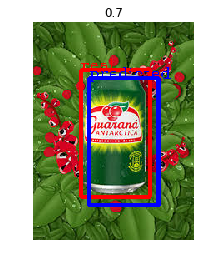

In [77]:
image_test1 = read_image(image_path)

real_boundingbox = [57, 57, 140, 209]
predicted_boundingbox = [67, 67, 150, 219]

 # drawing boundingboxes and the corresponding probability on image
image = drawing_boundingboxes( image_test1, real_boundingbox, 'red', 'real' )
image = drawing_boundingboxes( image_test1, predicted_boundingbox, 'blue', 'predicted' )

_, score = compute_scores(real_boundingbox, predicted_boundingbox)
  
print_image_with_iou(image_test1, score)

jaccard_similarity_score 0.0
IOU 0.3031674208144796


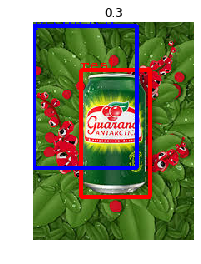

In [78]:
image_test1 = read_image(image_path)

real_boundingbox = [57, 57, 140, 209]
predicted_boundingbox = [0, 4, 124, 174]

# drawing boundingboxes and the corresponding probability on image
image = drawing_boundingboxes( image_test1, real_boundingbox, 'red', 'real' )
image = drawing_boundingboxes( image_test1, predicted_boundingbox, 'blue', 'predicted' )

_, score = compute_scores(real_boundingbox, predicted_boundingbox)
  
print_image_with_iou(image_test1, score)

jaccard_similarity_score 0.25
IOU 0.363639767833739


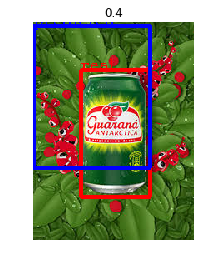

In [79]:
image_test1 = read_image(image_path)

real_boundingbox = [57, 57, 140, 209]
predicted_boundingbox = [0, 4, 140, 174]

# drawing boundingboxes and the corresponding probability on image
image = drawing_boundingboxes( image_test1, real_boundingbox, 'red', 'real' )
image = drawing_boundingboxes( image_test1, predicted_boundingbox, 'blue', 'predicted' )

_, score = compute_scores(real_boundingbox, predicted_boundingbox)
  
print_image_with_iou(image_test1, score)

**Conclusion:** The jaccard similarity score implemented on [sklearn](sklearn.metrics.jaccard_similarity_score) is not suitable for our purposes.

**Test 02**

In [62]:
image_path_test2 = "../Data/Test/CocaCola/coca.jpg"

jaccard_similarity_score 0.25
IOU 0.8267394270122783
jaccard_similarity_score 0.5
IOU 0.8201009028146574


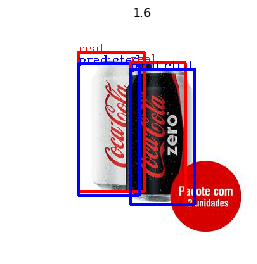

In [82]:
image_test2 = read_image(image_path_test2)

real_boundingbox_A = [71, 47, 175, 267]
predicted_boundingbox_A = [71, 65, 167, 273]
# drawing boundingboxes and the corresponding probability on image
image = drawing_boundingboxes( image_test2, real_boundingbox_A, 'red', 'real' )
image = drawing_boundingboxes( image_test2, predicted_boundingbox_A, 'blue', 'predicted' )
_, score_A = compute_scores(real_boundingbox_A, predicted_boundingbox_A)

real_boundingbox_B = [153, 64, 240, 287]
predicted_boundingbox_B = [153, 74, 255, 287]
# drawing boundingboxes and the corresponding probability on image
image = drawing_boundingboxes( image_test2, real_boundingbox_B, 'red', 'real' )
image = drawing_boundingboxes( image_test2, predicted_boundingbox_B, 'blue', 'predicted' )
_, score_B = compute_scores(real_boundingbox_B, predicted_boundingbox_B)

total_score = score_A + score_B
print_image_with_iou(image_test2, total_score)

We can use the sum of the scores as a accuracy measure. A very good score should be close to the number of objects on image.

### References

* [Intersection-over-union between two detections](https://stackoverflow.com/questions/28723670/intersection-over-union-between-two-detections)  
* [Jaccard index](https://en.wikipedia.org/wiki/Jaccard_index)
* [Jaccard Similarity Score - sklearn](sklearn.metrics.jaccard_similarity_score)